# Titanic - Machine Learning from Disaster

* Name : Lior Toledano
* Account URL: https://www.kaggle.com/liortoledano/account


* First of all let's give a general discreption on the Titanic Disasster
- On April 15, 1912, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Workflow Stage

1. general discreption
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Supply or submit the results.

## Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** As the feature values change does the solution state change as well

**Converting.** For modeling stage, one needs to prepare the data. 

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. 

**Creating.** Can we create new features based on an existing feature or a set of features




In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
# visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn import
#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve,train_test_split)

from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

combine = [train_df, test_df]
print("Our dataset feature are: " ,train_df.columns.values)

Our dataset feature are:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Keys Definitions**

* survival - Survival 0 = No, 1 = Yes 
* pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sex - Sex
* Age - Age in years
* sibsp - # of siblings / spouses aboard the Titanic
* parch - # of parents / children aboard the Titanic
* ticket - Ticket number
* fare - Passenger fare
* cabin - Cabin number
* embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# preview the start of the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# conclusions:
*          The ticket feature will not goes to the model because its irrelevant to our prediction


In [4]:
# preview the end of the data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#Show information about the data checking the types of the features And if there are any null values in the data set
train_df.info()
print("\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

* Conclusion :
*    The cabin feature got alot of null values - So we wont consider it in the model
*    Age feature also got alot of null values - we have to check it later
*    All the other features have 8 null values in the train set and some except the Embarked feature


# Analyze by describing data - Show a numerical categories statistic 

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Using groupby function to find the mean survival by the other features

In [7]:
#Checking the Probabilery between Pclass (ticket class) and the survival rate
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# Checking the Probabilery between the sex and the survival rate
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


* Observations:
* we can see that most of the females on the board survived ( 74 % ) and most of the males didn't survived( 81 %)
* Conclusion :
* Sex feature goes to the model because its got a high correlation to the survived rate

In [9]:
# Checking the Probabilery between SibSp(# of siblings / spouses aboard the Titanic) and the survival rate
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
# Checkingthe Probabilery  between Parch( # of parents / children aboard the Titanic) and the Survived Rate
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Visual that correlate between the features & the target.
* Thats help as see the correlation more brightly

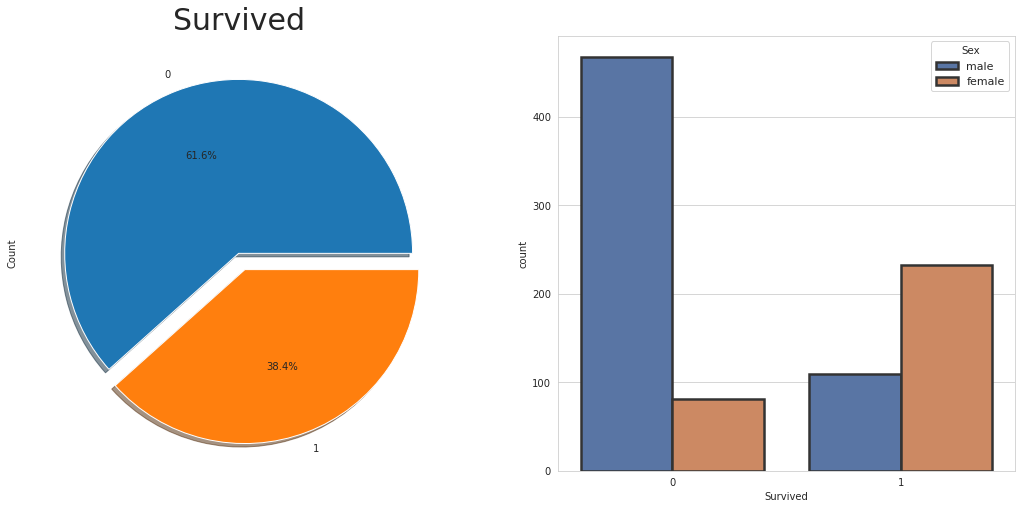

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_df['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Survived',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Survived',hue='Sex',linewidth=2.5,edgecolor=".2",data=train_df,ax=ax[1])
plt.ioff() # This removes the matplotlib notifications

### According to our training set
#### It can be seen that most of the passengers did not survive the cruise.
#### Those who survived most were women and a few more men in relation to their quantity on the ship
#### Those who did not survive, the vast majority are men and only less than a third of the women who were on the ship did not survive

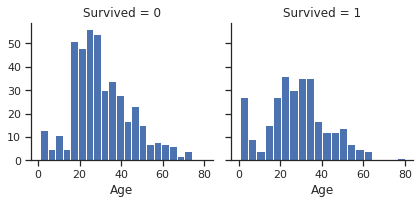

In [12]:
# Visual the correlation bewteen Age and if survived ( 0 = did not survived & 1 = survived )
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

* we can see that most of the passengers and the unsurvived are between age 18 to 40 years old
* And that the age feature is super relevant to our prediction

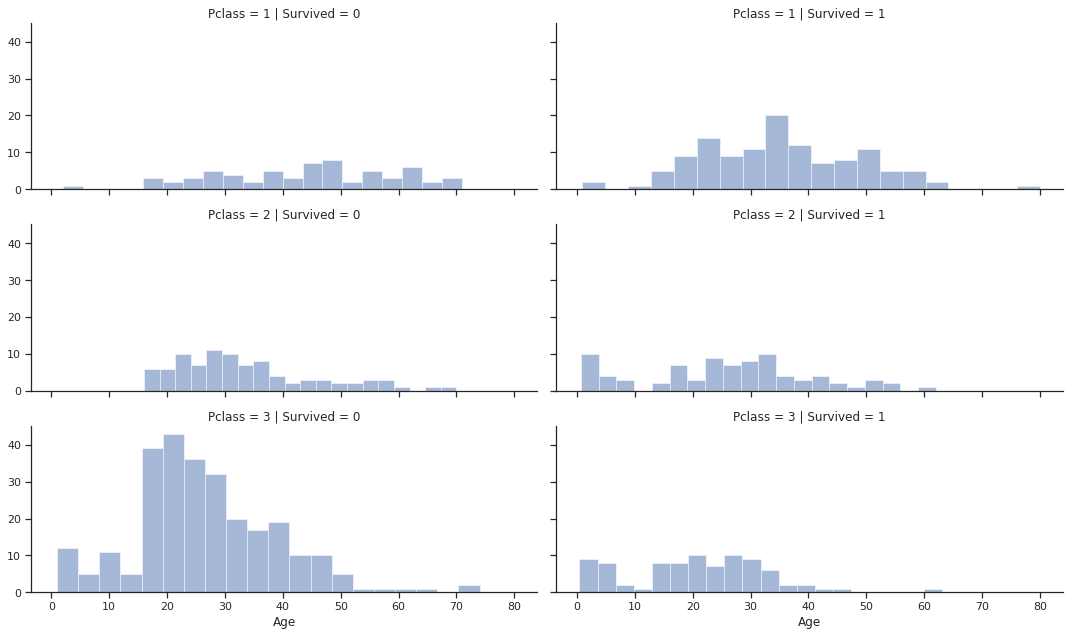

In [13]:
#Visual the correlation bewteen Pclass and if survived ( 0 = did't survived - False  & 1 = survived - True )
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3, aspect=2.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* Observations:
1. *    most of the passengers in class 3 didn't survived ( the lowest level of class ticket)
2. *    most of the passengers in class 1 survived
3. *    most of the childerns in classes 2 and 1 under 18 years old had a high chance to survived
   *    most of the unsurvived passengers was in class 3 and in age between 18 - 40
* Conclusions:
    * The pclass will goes to our model
    
    # Lets learn more about how the titanic build
    * as we can see in the pic below the first class are in the higher position on the ship thats probably explain the high numbers of survivals
    * in a similar way the third class passengers got the lowest chance to survived because they was on the lowest part in the ship
    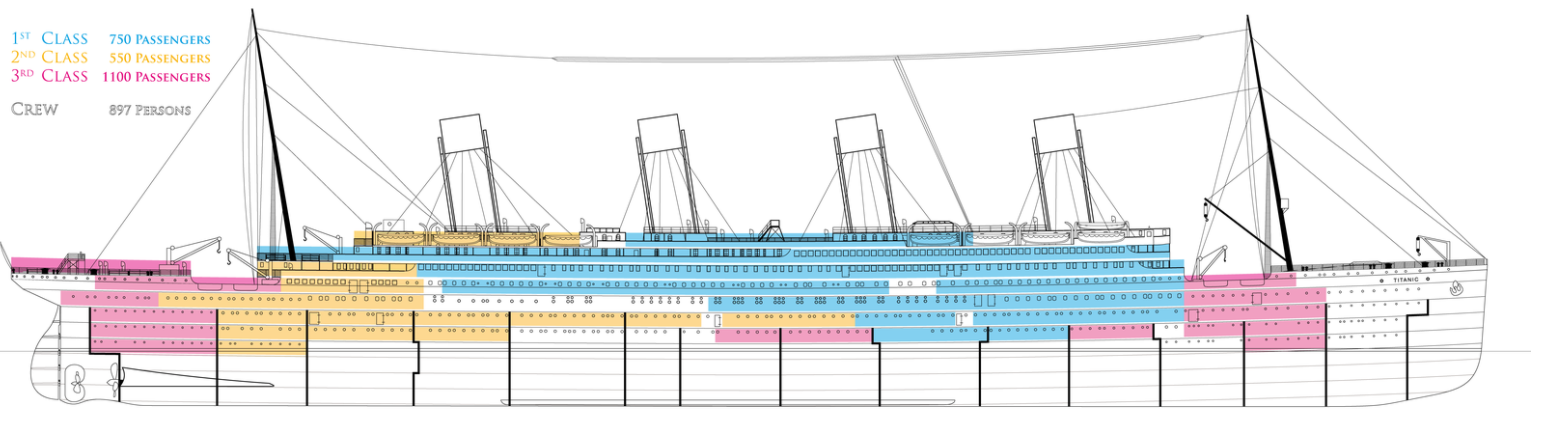

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


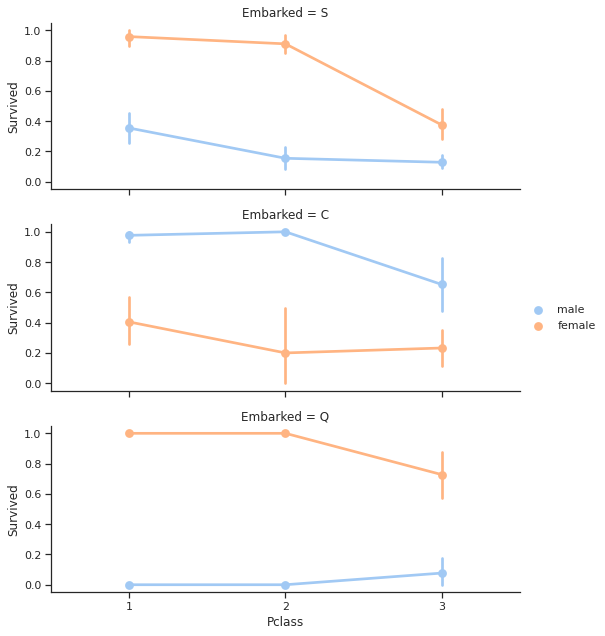

In [14]:
grid = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=2.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex' , palette = 'pastel')
grid.add_legend()

### As we can see the embarked feature got a conection with the survived feature 
##### we have to handle the missing values. we are going to do it in the feaures engeeniring part
### We can infer some unexpected conclusions from the graphs
#### Although in general most women survived and men did not
#### It can be seen that passengers who Embarked from 'Cherbourg' happened the opposite


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


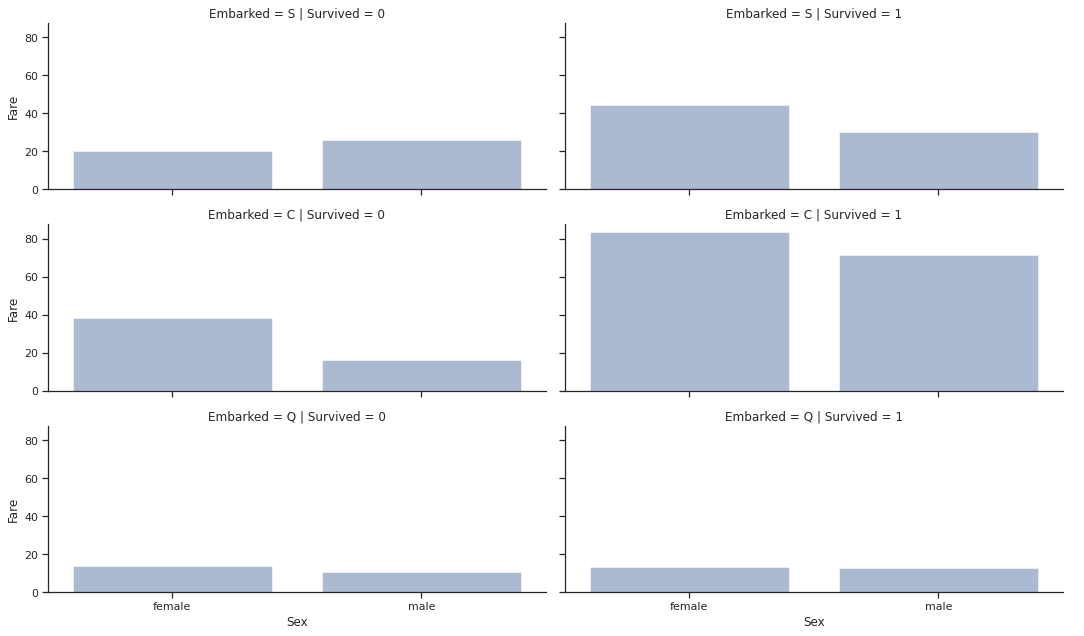

In [15]:
#Embarked places map - C = Cherbourg, Q = Queenstown, S = Southampton# 
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=3, aspect=2.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## in general most women paied higher fare then the men
### And it's connect to the graph above that women that Embarked from 'Cherbourg' survived les then the men from that place

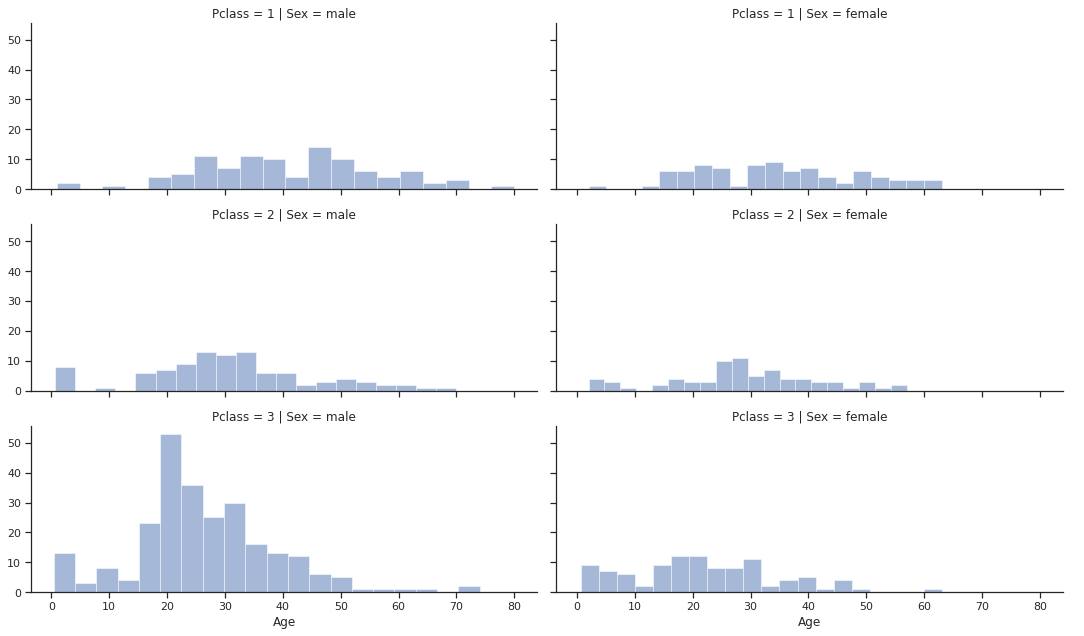

In [16]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=3, aspect=2.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

## Now let's handle the None values in age and Fare features
* we saw earlier that we have got more then 200 none values in the 'Age' feature
* the way that is chose to handle it its by puting the mean age in every none values exsist in the data

In [17]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [18]:
fill_na_median(train_df, 'Fare')
fill_na_median(test_df, 'Fare')
fill_na_random_pick_column_distribution(train_df, 'Age')
fill_na_random_pick_column_distribution(test_df, 'Age')
fill_na_random_pick_column_distribution(train_df, 'Embarked')
fill_na_random_pick_column_distribution(test_df, 'Embarked')

# let's start with the feature engeeniring

## we want to drop the non numerical categoriy 'Ticket' and the alot of missing values 'Cabin' features

In [19]:

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [20]:
# checking if there are any None values left
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

### Get more information about the sex from the name feature and add a new feature that we called Title to our dataset


In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# reduce the number of options in 'Title' attribute to get the data ready to modeling - by union the Rare title together
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
# PassengerId and the Name features aren't relevat to out modeling so lets drop them
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

* Now lets work on the SibSp and Parch features
* Because both of them talk about the the Family Size

In [24]:
for dataset in combine:
    # Number of brother and parntes on the boat . + 1 representing the current passenger
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


* as we can see the passengers that been on the ship with a small number of famliy member
* got the highest Probability Survived the most ( 2 - 4 Pepole)
* let's dig a little bit deeper
### from FamilySize feature we create a new one that we refer if the passenger abord alone to the titanic

In [25]:

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [26]:
# Removing our old features
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [27]:

mostfreq = train_df.Embarked.dropna().mode()[0]
mostfreq
for dataset in combine:

    dataset['Embarked'] = dataset['Embarked'].fillna(mostfreq)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


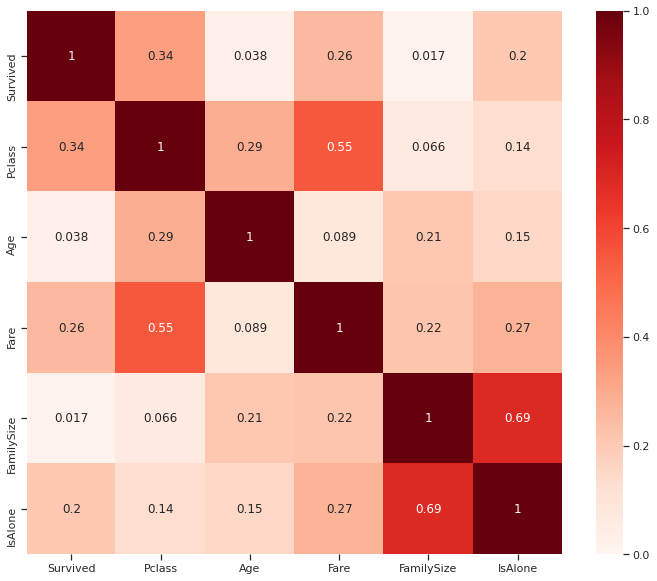

In [28]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = np.abs(train_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

In [29]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1)

## Sex
#### Accounts of the evacuation effort indicate the ship's officers applied the 'Women and children first' doctrine when organizing people in lifeboats. Simply asserting all women survived and all men died should improve our model. Of course we know some women died and some men survived. You can get details in this gender as a feature analysis. Meanwhile, we're starting with broad generalizations and will refine our features along the way.

In [30]:
# create dummy variables
_feature = 'Sex'

# train
dummies = pd.get_dummies(X_train[_feature])
X_train = X_train.join(dummies)

# test
dummies = pd.get_dummies(X_test[_feature])
X_test = X_test.join(dummies)

## Person
#### We can account for the misclassified children if we engineer a 'Person' feature with the labels 'male_adult', 'female_adult' and 'child'. As a refinement to our model, we'll assert all adult females and all children survived while all adult males died.

In [31]:
feature = 'person'

# It's likely the age threshold for adults was younger in the early 1900s.
# Account of a 9 year-old boy almost getting refused a lifeboat:
# https://www.encyclopedia-titanica.org/titanic-survivor/winnie-coutts.html
# May want to try younger ages here.
child_age = 14

def get_person(passenger):
    """
    Returns a person value of 'female_adult', 'male_adult', 'child'.
    """
    age, sex = passenger
    
    if (age < child_age):
        return 'child'
    elif (sex == 'female'):
        return 'female_adult'
    else:
        return 'male_adult'
    
X_train = X_train.join(pd.DataFrame(X_train[['Age', 'Sex']].apply(get_person, axis=1), columns=['person']))
X_test = X_test.join(pd.DataFrame(X_test[['Age', 'Sex']].apply(get_person, axis=1), columns=['person']))

X_train['person'].value_counts().sort_index()

child            91
female_adult    277
male_adult      523
Name: person, dtype: int64

In [32]:
_feature = 'person'

_columns = ['male_adult', 'female_adult', 'child']

# train
dummies = pd.get_dummies(X_train[_feature])
X_train = X_train.join(dummies)

# test
dummies = pd.get_dummies(X_test[_feature])
X_test = X_test.join(dummies)

## Class
##### Looking at survival rates, first and second class had much higher survival rates for women and children. With a class feature, our model will assert all female adults and children in classes 1 and 2 survived and everyone else died.

In [33]:
# create dummy variables for person column. 
_feature = 'Pclass'

# train
dummies = pd.get_dummies(X_train[_feature], prefix='class')
X_train = X_train.join(dummies)

# test
dummies = pd.get_dummies(X_test[_feature], prefix='class')
X_test = X_test.join(dummies)

In [34]:
 #Turn the 'sex' feature to numeric category ( 0 is refrence to male and 1 to female)


X_train['Sex'] = X_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [35]:
# Turn the 'Title' feature to numeric category
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

X_train['Title'] = X_train['Title'].map(title_mapping)
X_train['Title'] = X_train['Title'].fillna(0) # when you see a nane value replace it with 0


X_test['Title'] = X_test['Title'].map(title_mapping)
X_test['Title'] = X_test['Title'].fillna(0) # when you see a nane value replace it with 0



In [36]:

X_train['Embarked'] = X_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_test['Embarked'] = X_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [37]:
X_train= X_train.drop(['person', 'class_3','male_adult','male'], axis=1)
X_test= X_test.drop(['person', 'class_3','male_adult','male'], axis=1)

In [38]:
X_test


,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,female,child,female_adult,class_1,class_2
0,3,0,34.5,7.8292,2,1,1,1,0,0,0,0,0
1,3,1,47.0,7.0000,0,3,2,0,1,0,1,0,0
2,2,0,62.0,9.6875,2,1,1,1,0,0,0,0,1
3,3,0,27.0,8.6625,0,1,1,1,0,0,0,0,0
4,3,1,22.0,12.2875,0,3,3,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,29.0,8.0500,0,1,1,1,0,0,0,0,0
414,1,1,39.0,108.9000,1,5,1,1,1,0,1,1,0
415,3,0,38.5,7.2500,0,1,1,1,0,0,0,0,0
416,3,0,27.0,8.0500,0,1,1,1,0,0,0,0,0


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    int64  
 1   Sex           891 non-null    int64  
 2   Age           891 non-null    float64
 3   Fare          891 non-null    float64
 4   Embarked      891 non-null    int64  
 5   Title         891 non-null    int64  
 6   FamilySize    891 non-null    int64  
 7   IsAlone       891 non-null    int64  
 8   female        891 non-null    uint8  
 9   child         891 non-null    uint8  
 10  female_adult  891 non-null    uint8  
 11  class_1       891 non-null    uint8  
 12  class_2       891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


## Feature Selection
We want to choose the best features for our use case.
We will use Scikit-learn RFECV to use CV and choose the best number of features on this dataset.
We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits.
we will do the feature selection on the GradientBoostingClassifier because he get me the best score

In [43]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

numerical_cols = X_train.select_dtypes(include=['int64', 'float64','uint8']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()
ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])
X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X_train, Y_train), columns=all_cols)

selector = RFECV(GradientBoostingClassifier(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, Y_train)
display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation score (nb of correct classifications)")
fig.show()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,class_1
0,0.827377,-0.737695,-0.536250,-0.502445,-0.568837,-0.707550,0.059160,-0.565685
1,-1.566107,1.355574,0.553565,0.786845,1.005181,1.235215,0.059160,1.767767
2,0.827377,1.355574,-0.263796,-0.488854,-0.568837,0.263832,-0.560975,-0.565685
3,-1.566107,1.355574,0.349224,0.420730,-0.568837,1.235215,0.059160,1.767767
4,0.827377,-0.737695,0.349224,-0.486337,-0.568837,-0.707550,-0.560975,-0.565685
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.195683,-0.386671,-0.568837,3.177981,-0.560975,-0.565685
887,-1.566107,1.355574,-0.740590,-0.044381,-0.568837,0.263832,-0.560975,1.767767
888,0.827377,1.355574,-1.285497,-0.176263,-0.568837,0.263832,1.299429,-0.565685
889,-1.566107,-0.737695,-0.263796,-0.044381,1.005181,-0.707550,-0.560975,1.767767


## The best subset of features is Pclass ,Sex,Age,Fare,Embarked,Title,FamilySize,FamilySize,class_1. 

In [44]:
_features =['Sex','Age', 'Title', 'Fare', 'class_1','FamilySize' ,'Pclass','Embarked']
X_train = X_train[_features]
X_test =X_test[_features]

This  subset only make a modle predict worth so i just use the holl set

In [45]:
X = X_train
t = Y_train

# Predictive Modeling
### Here, we split our datasets according to the previous amounts and make test and train set. To avoid overfitting event we can create validation set but that's not effective. So, we use K-Fold approaches and use StratifiedKFold to split the train datasets into 10 (by default).

In [46]:

# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

# Classifier
### I compare 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.
1. KNN
2. AdaBoost
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Support Vector Machine
7. Gradient Boosting
8. Logistic regression
9. Linear Discriminant Analysis
10. Multiple layer perceprton

# Evaluation using Cross Validation
###  great alternative is to use Scikit-Learn's cross-validation feature. The following performs K-fold cross validation; it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Models 10 times, picking a different fold for evaluation every time and training on the other 9 folds.

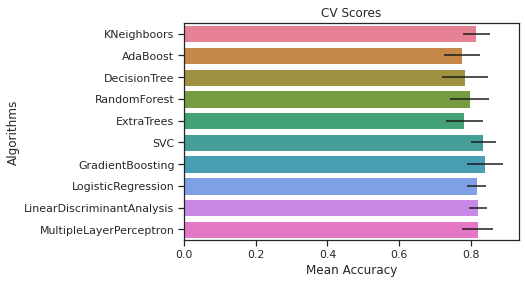

In [47]:
# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_encoded, Y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

## Let's explore following models separately:

### GBC Classifier
### Linear Discriminant Analysis
### Logistic Regression
### Random Forest Classifer
### Gaussian Naive Bayes
### Let's start with Gradient Boosting Classifier.

## But first talk about Confusion Matrix
### We want to be able to explain the results of a classifier.
#### When talking about binary classification, the classification type of a sample can be one out of four:

* 1.TP (True Positive) - The model classified correctly that a sample is positive.
* 2.TN (True Negative) - The model classified correctly that a sample is negative.
* 3.FP (False Positive) - The model classified a sample as positive but the sample is actually negative.
* 4.FN (False Negative) - The model classified a sample as negative but the sample is actually positive.
* We can show these values in a matrix:
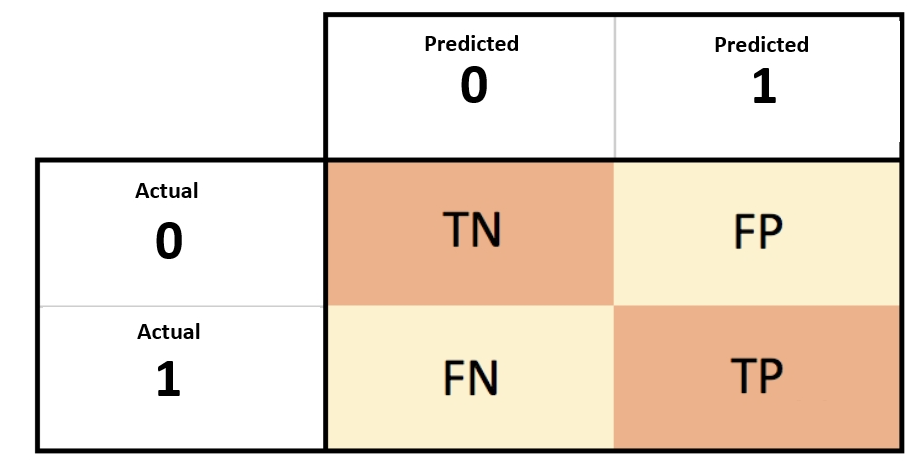

* When we use it on code, we can use Scikit-learn confusion_matrix.
* Let's create a function that will calculate the confusion matrix for each of our classifiers that we will trained on the Train Data.

In [48]:

from sklearn.metrics import confusion_matrix
def confusion_matrix_function(classifier,X_train, X_val, t_train, t_val):
    # calculate cm for train and val
    cls = classifier.fit(X_train, t_train)
    y_train = cls.predict(X_train)
    y_val = cls.predict(X_val)
    cm_train = confusion_matrix(t_train, y_train)
    cm_val = confusion_matrix(t_val, y_val)

    print('cm_train')
    print(cm_train)
    print()
    print('cm_val')
    print(cm_val)
    # show tn, fp, fn and tp for train and val
    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
    tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

    print(f'Train: TN {tn_train:4}, FP {fp_train:4}, FN {fn_train:4}, TP {tp_train:4}')
    print(f'Val:   TN {tn_val:4}, FP {fp_val:4}, FN {fn_val:4}, TP {tp_val:4}')
    
    # lot confusion matrix of train and val as heatmaps in seaborn
    cm_train_df = pd.DataFrame(cm_train, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])
    cm_val_df = pd.DataFrame(cm_val, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])

    sns.set(font_scale=2)
    plt.figure(figsize = (15,12))
    fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title("cm_train")
    plt.show()
    print()
    plt.figure(figsize = (15,12))
    fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
    fig.set_title("cm_val")
    plt.show()

In [49]:
# split the data to train and validation
X_train, X_val, Y_train, t_val = train_test_split(X, t, test_size=0.3, random_state=1)

[0.79365079 0.77777778 0.84126984 0.85483871 0.85483871 0.80645161
 0.85483871 0.87096774 0.90322581 0.77419355]
83.32
cm_train
[[380  16]
 [ 38 189]]

cm_val
[[134  19]
 [ 37  78]]
Train: TN  380, FP   16, FN   38, TP  189
Val:   TN  134, FP   19, FN   37, TP   78


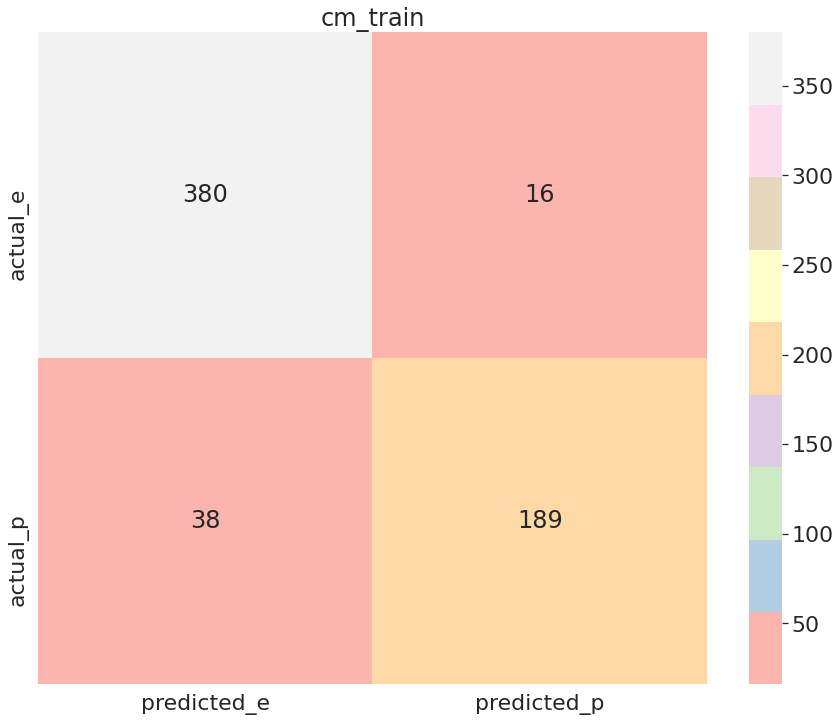

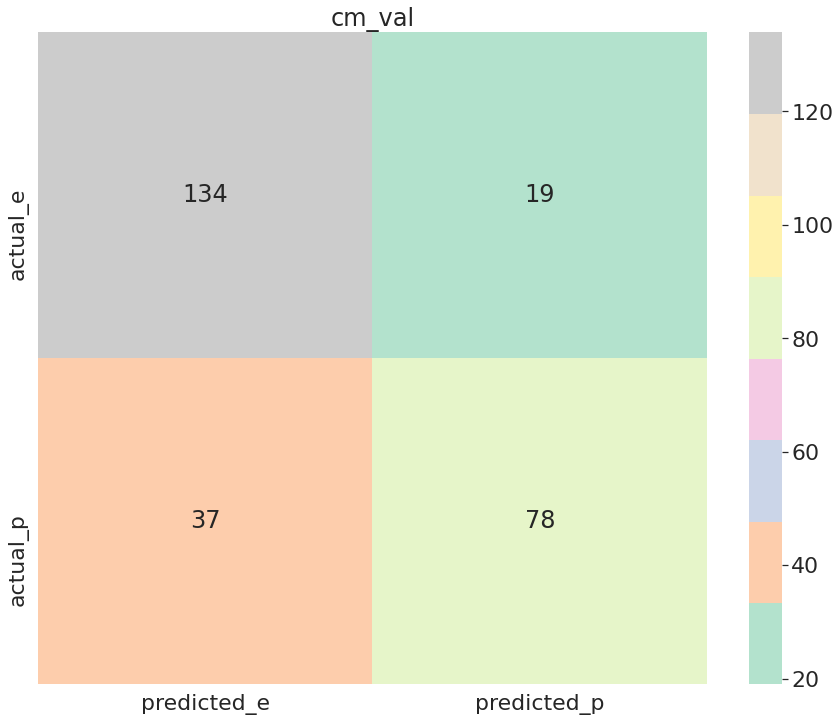

In [50]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))
confusion_matrix_function(GBC_Model,X_train, X_val, Y_train, t_val)

### LDA

[0.74603175 0.79365079 0.85714286 0.83870968 0.85483871 0.87096774
 0.80645161 0.80645161 0.80645161 0.75806452]
81.39
cm_train
[[340  56]
 [ 55 172]]

cm_val
[[131  22]
 [ 37  78]]
Train: TN  340, FP   56, FN   55, TP  172
Val:   TN  131, FP   22, FN   37, TP   78


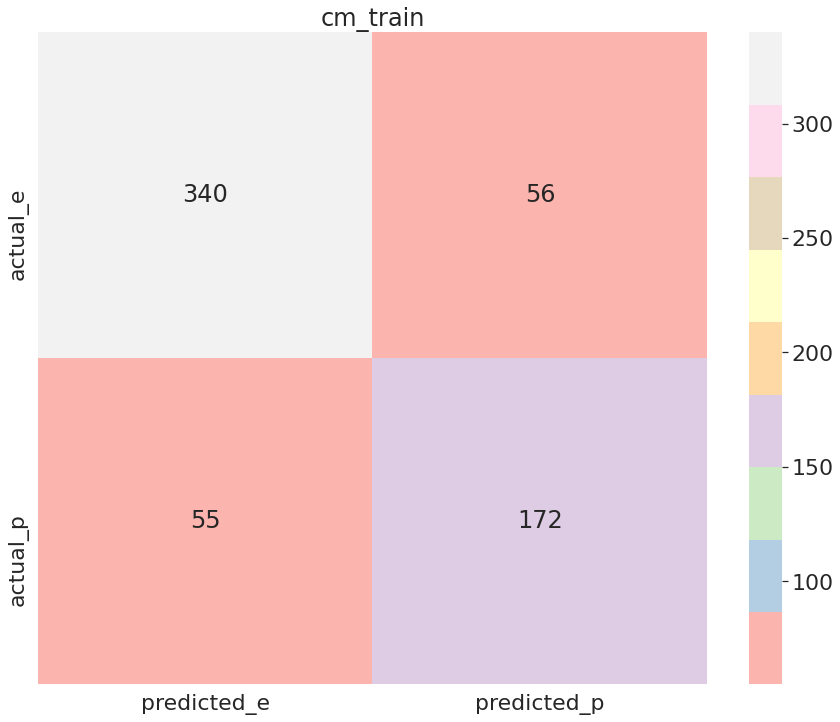

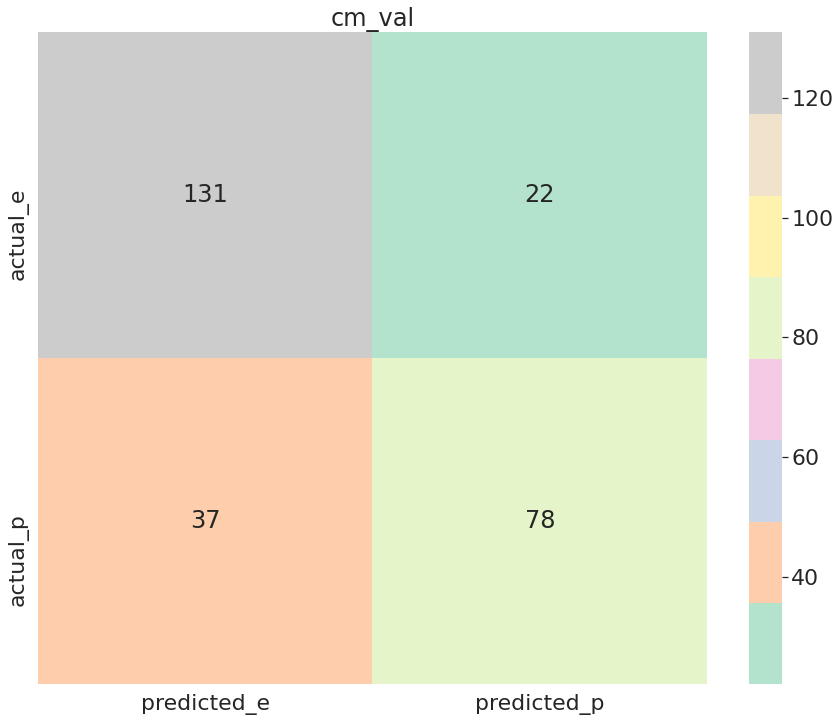

In [51]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))
confusion_matrix_function(LDA_Model,X_train, X_val, Y_train, t_val)

### Logistic Regression classifier.



[0.76190476 0.79365079 0.85714286 0.85483871 0.85483871 0.87096774
 0.82258065 0.79032258 0.79032258 0.75806452]
81.55
cm_train
[[342  54]
 [ 55 172]]

cm_val
[[132  21]
 [ 36  79]]
Train: TN  342, FP   54, FN   55, TP  172
Val:   TN  132, FP   21, FN   36, TP   79


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



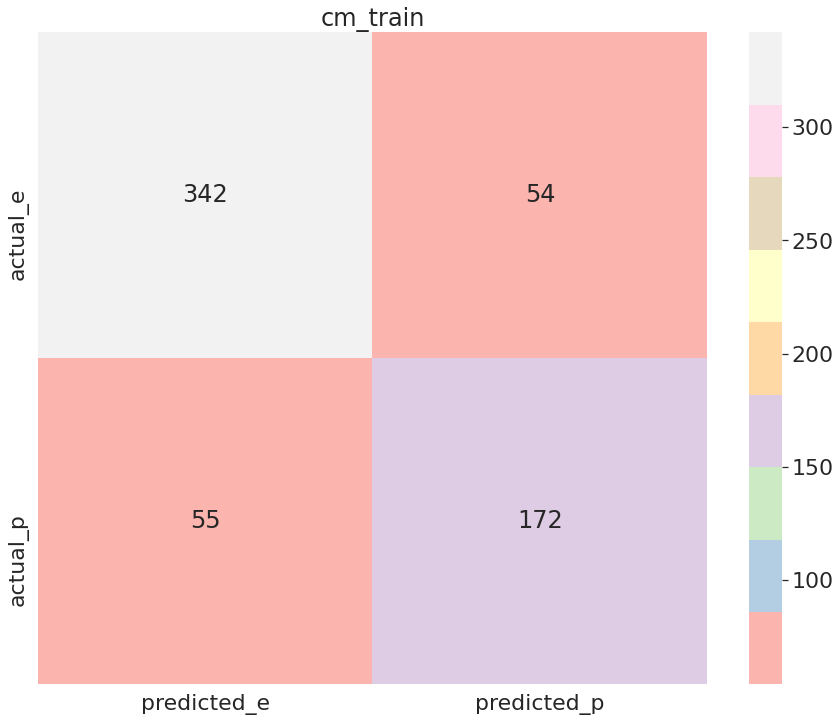

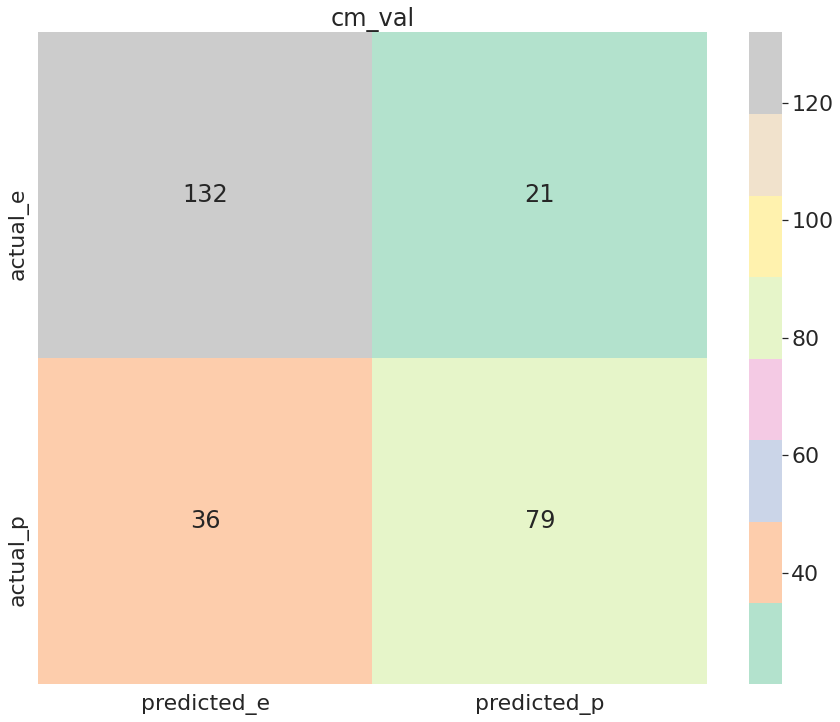

In [52]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

confusion_matrix_function(Log_Model,X_train, X_val, Y_train, t_val)

### Random Forest is typically an ensemble of decesion tree classifer. 

[0.79365079 0.80952381 0.87301587 0.83870968 0.85483871 0.77419355
 0.85483871 0.82258065 0.87096774 0.75806452]
82.5
cm_train
[[394   2]
 [ 14 213]]

cm_val
[[132  21]
 [ 43  72]]
Train: TN  394, FP    2, FN   14, TP  213
Val:   TN  132, FP   21, FN   43, TP   72


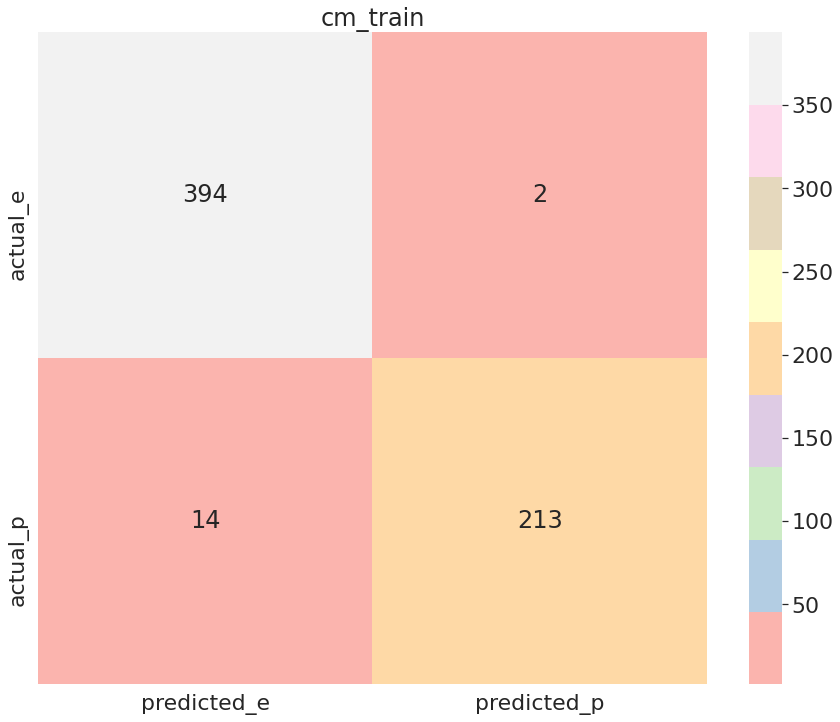

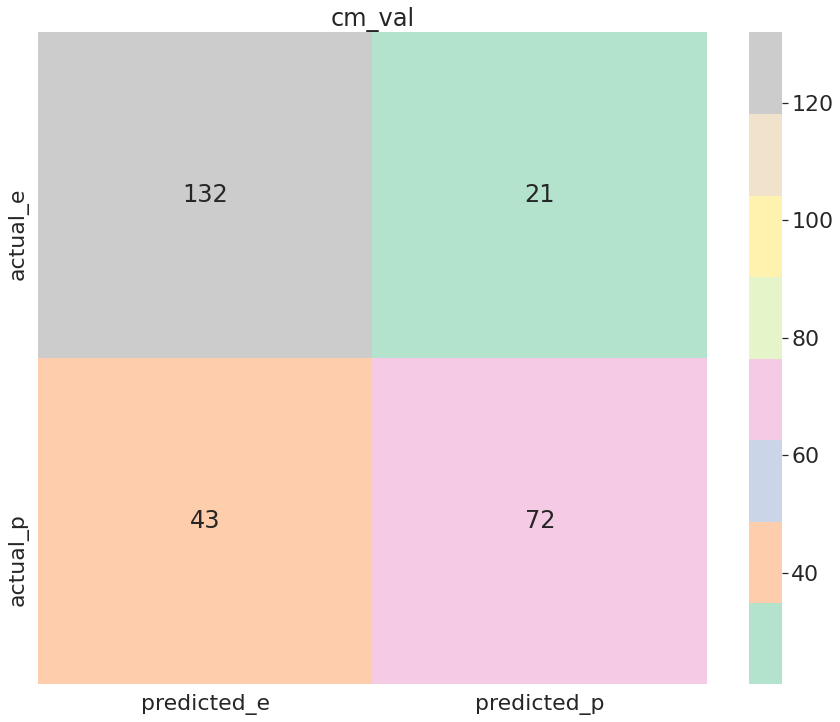

In [53]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

confusion_matrix_function(RFC_model,X_train, X_val, Y_train, t_val)

### Gaussian NB performs pretty well on binary classification.



[0.73015873 0.73015873 0.87301587 0.79032258 0.83870968 0.82258065
 0.80645161 0.75806452 0.79032258 0.80645161]
79.46
cm_train
[[317  79]
 [ 46 181]]

cm_val
[[118  35]
 [ 33  82]]
Train: TN  317, FP   79, FN   46, TP  181
Val:   TN  118, FP   35, FN   33, TP   82


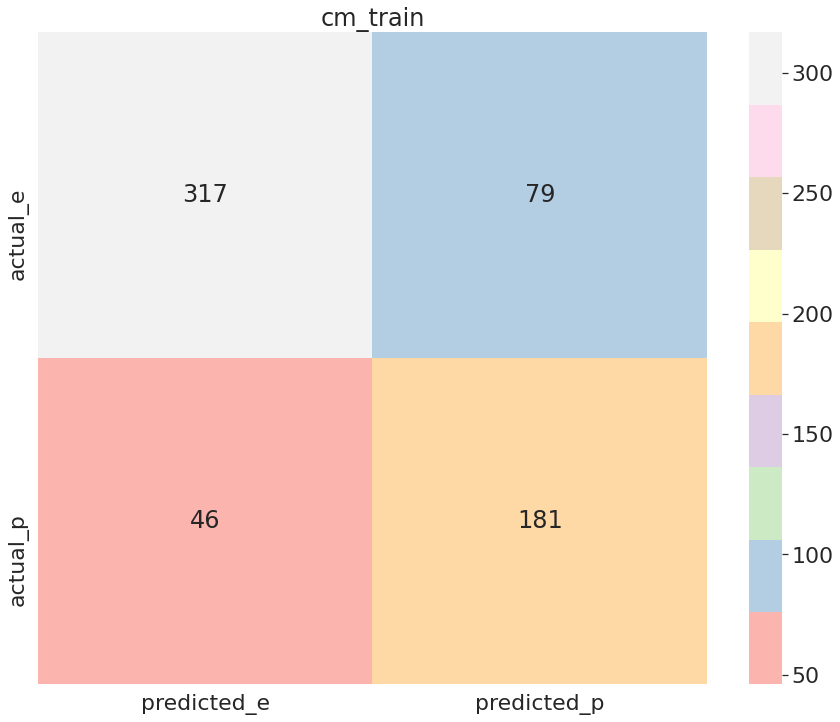

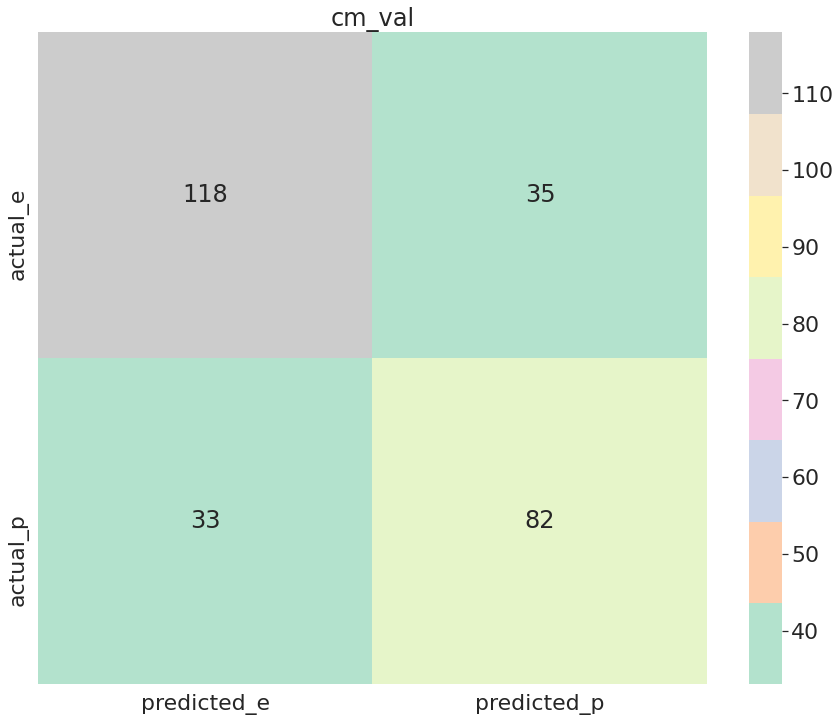

In [54]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

confusion_matrix_function(GNB_Model,X_train, X_val, Y_train, t_val)

### Support Vector Machine or SVM is pretty much promsing ML algorithm. It should perform well also.

[0.66666667 0.61904762 0.6984127  0.72580645 0.75806452 0.66129032
 0.64516129 0.67741935 0.67741935 0.77419355]
69.03
cm_train
[[360  36]
 [155  72]]

cm_val
[[135  18]
 [ 77  38]]
Train: TN  360, FP   36, FN  155, TP   72
Val:   TN  135, FP   18, FN   77, TP   38


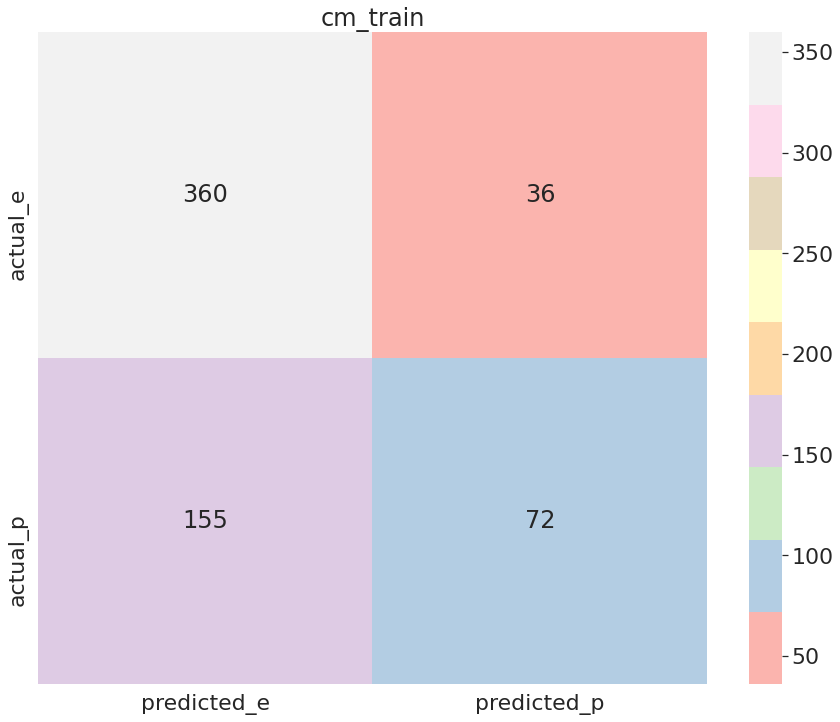

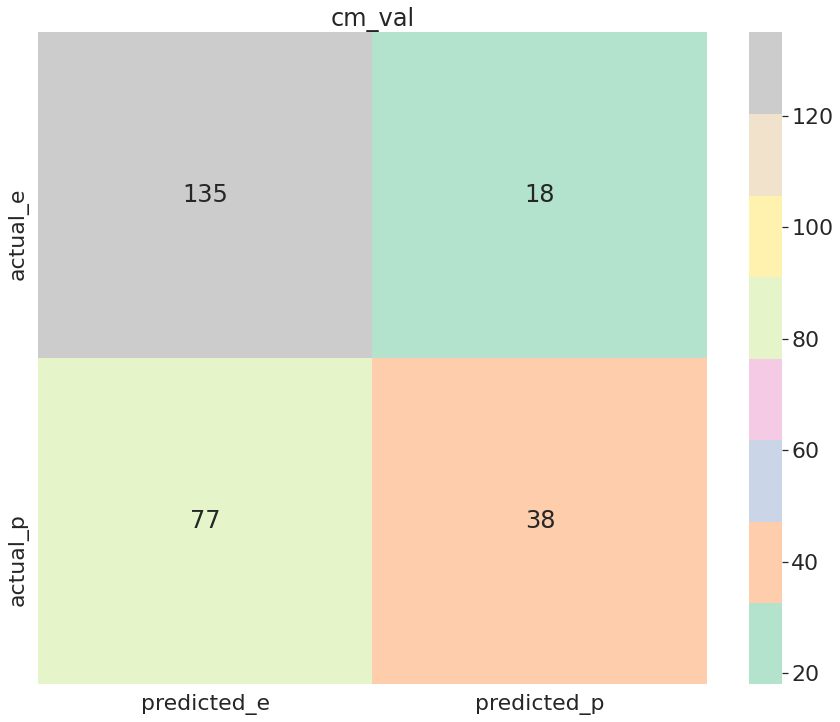

In [55]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))
confusion_matrix_function(SVM_Model,X_train, X_val, Y_train, t_val)

# Hyperparameter Tuning
#### I decided to choose this promising models of GradientBoosting, Linear Discriminant Analysis, RandomForest, Logistic Regression and SVM for the ensemble modeling. So, now we need to fine-tune them.

#### One way to do that would be to fiddle with the hyperparameters manually until we find a great combination of hyperparamerter values. This would be very tedious work, and we may not have time to explore many combination. Instead we should get Scikit-Learn's GridSearchCV to search for us. All we need to do is tell it which hyperparameters we want it to experiment with, and what values to try out and it will evaluate all the possible combination of hyperparameter values, using cross-validation.

## Hyper-Parameter Tuning on GBC

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  1.6min finished


cm_train
[[370  26]
 [ 55 172]]

cm_val
[[138  15]
 [ 40  75]]
Train: TN  370, FP   26, FN   55, TP  172
Val:   TN  138, FP   15, FN   40, TP   75


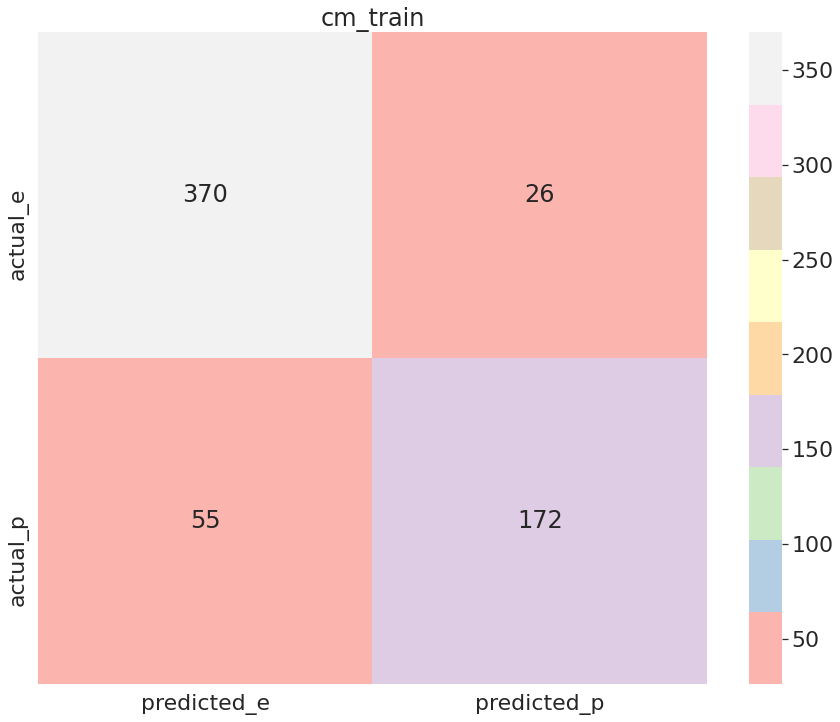

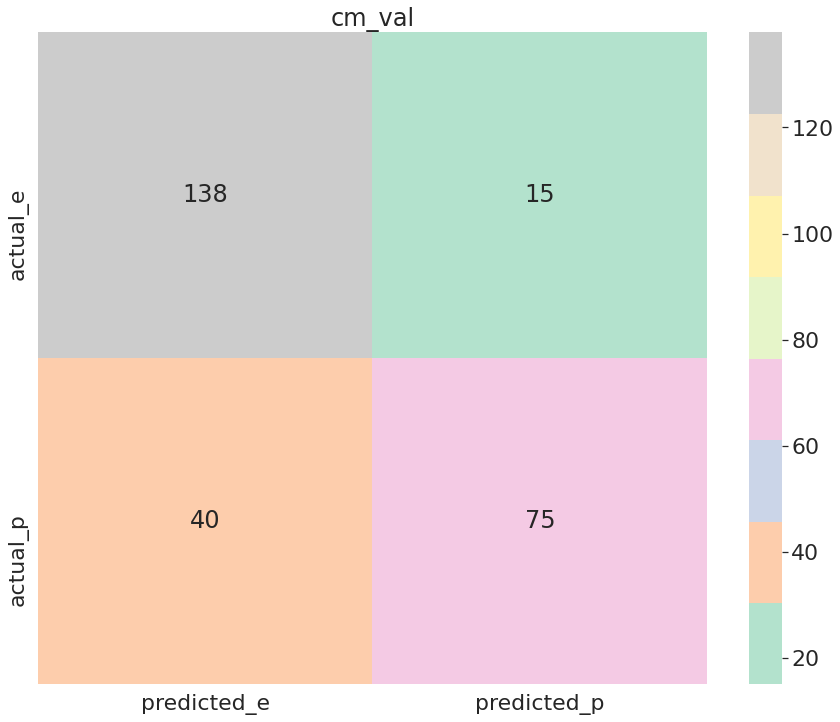

0.8379672299027137

In [56]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
            'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
confusion_matrix_function(GBC_best,X_train, X_val, Y_train, t_val)
# Best score
gsGBC.best_score_

## Hyper-Parameter Tuning on RFC



Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   41.6s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.3min finished


cm_train
[[374  22]
 [ 58 169]]

cm_val
[[138  15]
 [ 44  71]]
Train: TN  374, FP   22, FN   58, TP  169
Val:   TN  138, FP   15, FN   44, TP   71


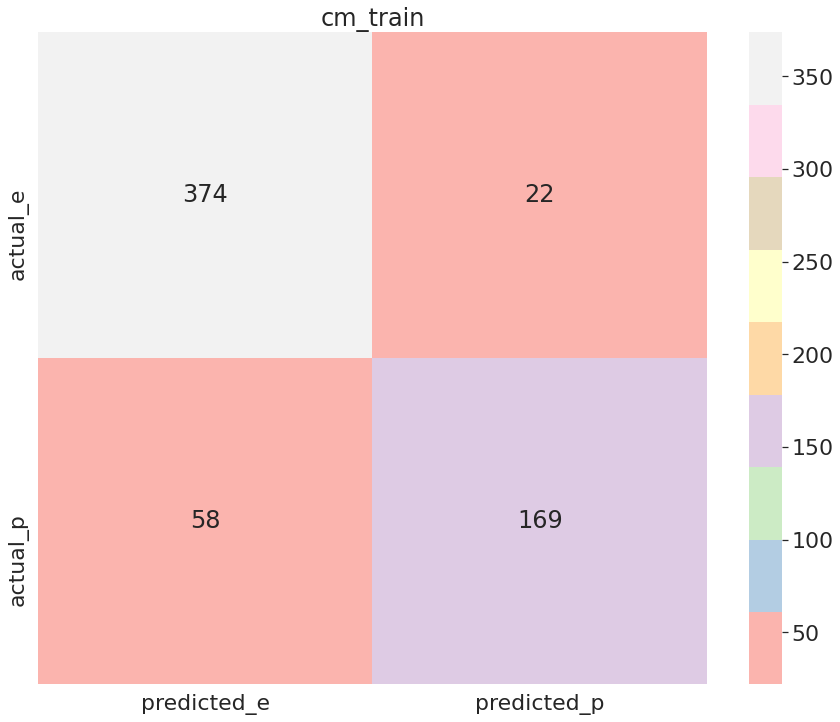

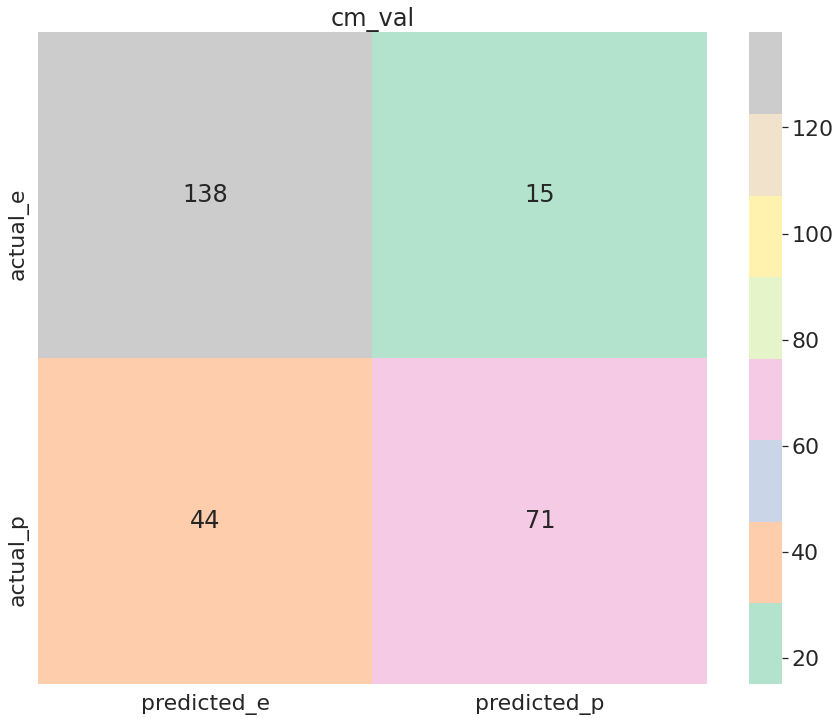

0.8475678443420378

In [57]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_
confusion_matrix_function(RFC_best,X_train, X_val, Y_train, t_val)
# Best score
gsRFC.best_score_

## Hyper-Parameter Tuning on LR



Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    7.9s finished


[LibLinear][LibLinear]cm_train
[[343  53]
 [ 57 170]]

cm_val
[[132  21]
 [ 38  77]]
Train: TN  343, FP   53, FN   57, TP  170
Val:   TN  132, FP   21, FN   38, TP   77


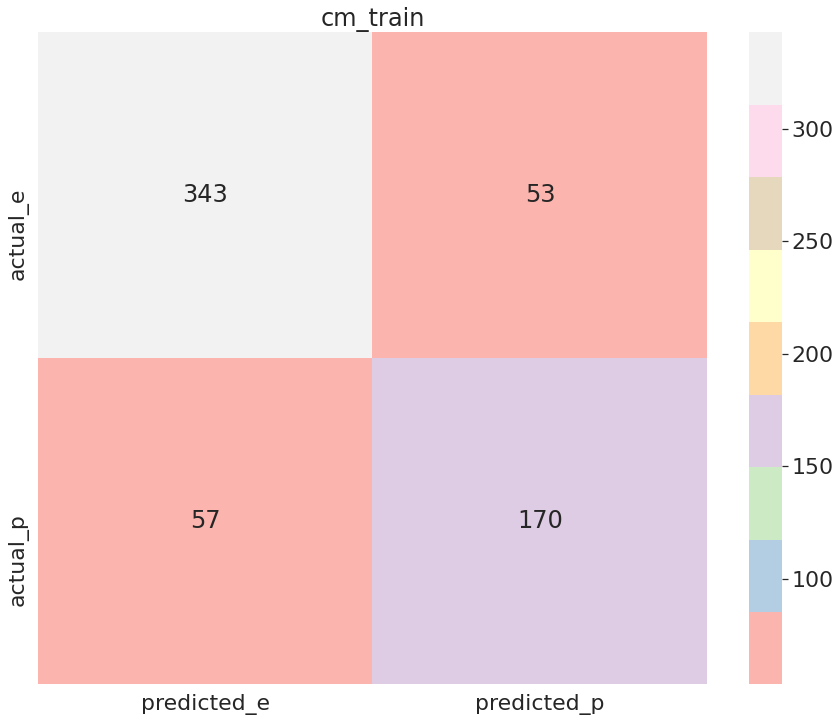

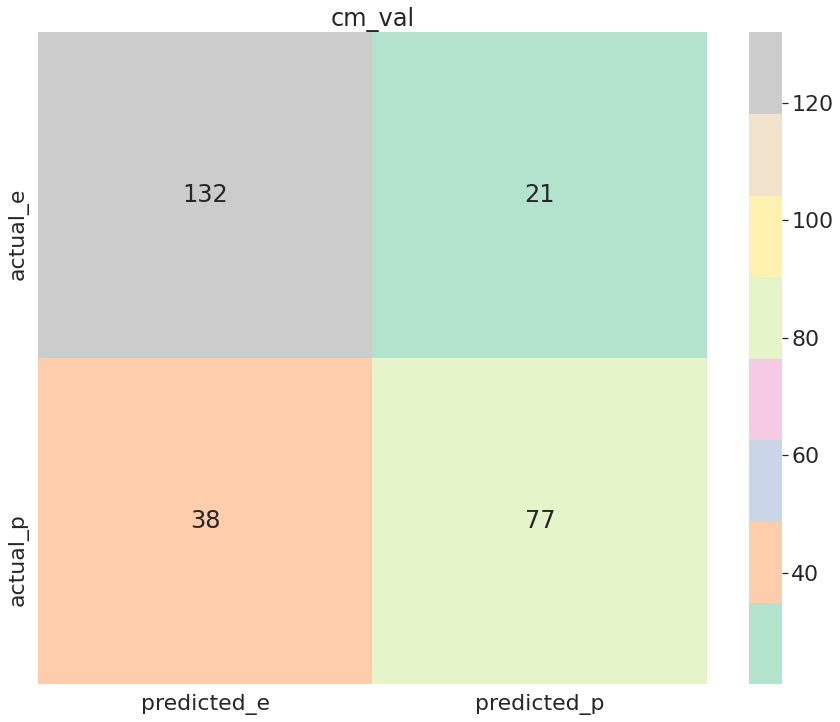

0.818689196108551

In [58]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

confusion_matrix_function(LRM_best,X_train, X_val, Y_train, t_val)

# Best score
gsLRM.best_score_

### Hyper-Parameter Tuning on LDA

Fitting 10 folds for each of 3 candidates, totalling 30 fits
cm_train
[[340  56]
 [ 55 172]]

cm_val
[[131  22]
 [ 37  78]]
Train: TN  340, FP   56, FN   55, TP  172
Val:   TN  131, FP   22, FN   37, TP   78


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.1s finished


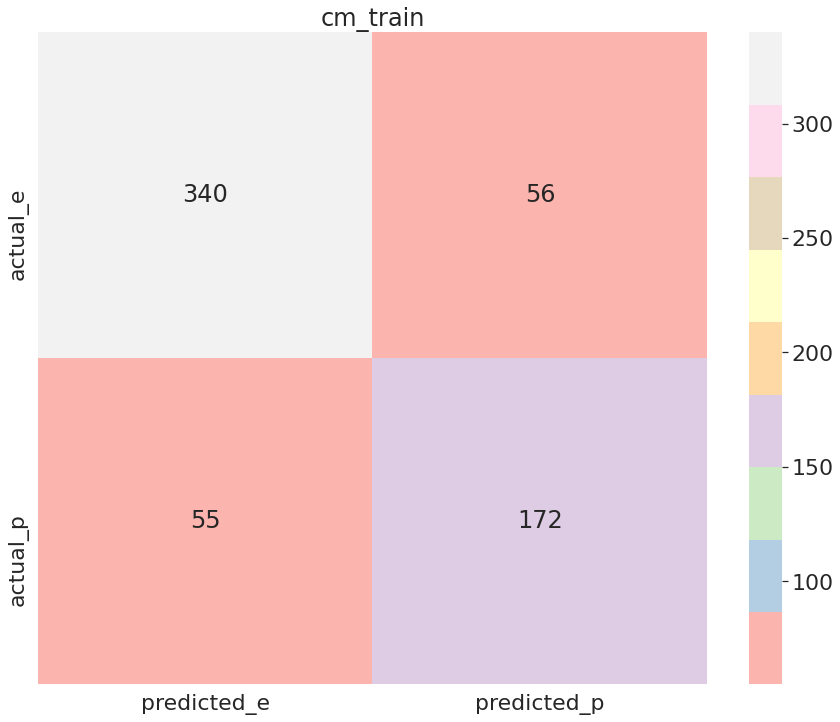

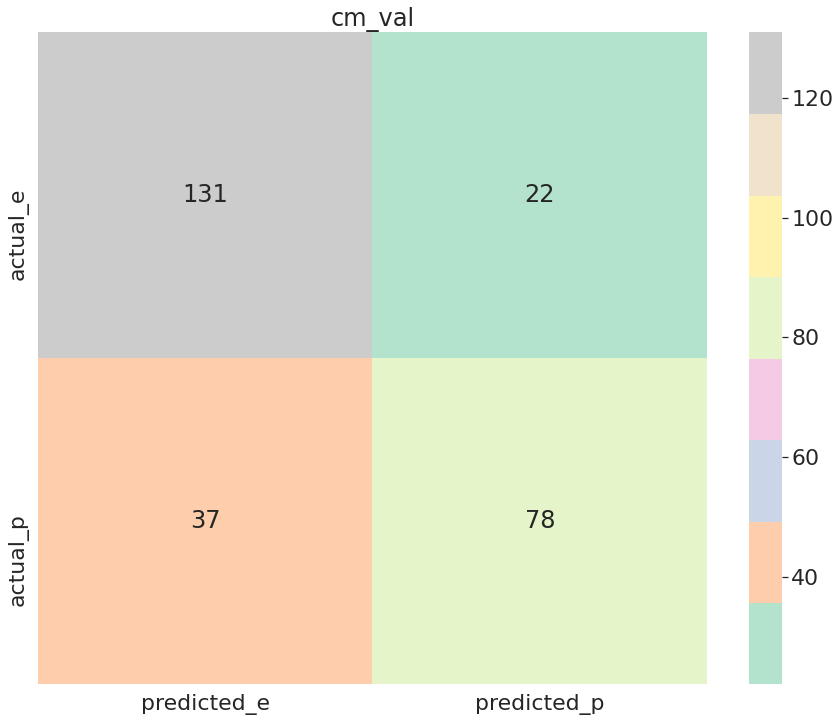

0.8138760880696365

In [59]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_


confusion_matrix_function(LDA_best,X_train, X_val, Y_train, t_val)
# Best score
gsLDA.best_score_


## Hyper-Parameter Tuning on SVC



Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   14.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.4s finished


cm_train
[[352  44]
 [ 45 182]]

cm_val
[[134  19]
 [ 43  72]]
Train: TN  352, FP   44, FN   45, TP  182
Val:   TN  134, FP   19, FN   43, TP   72


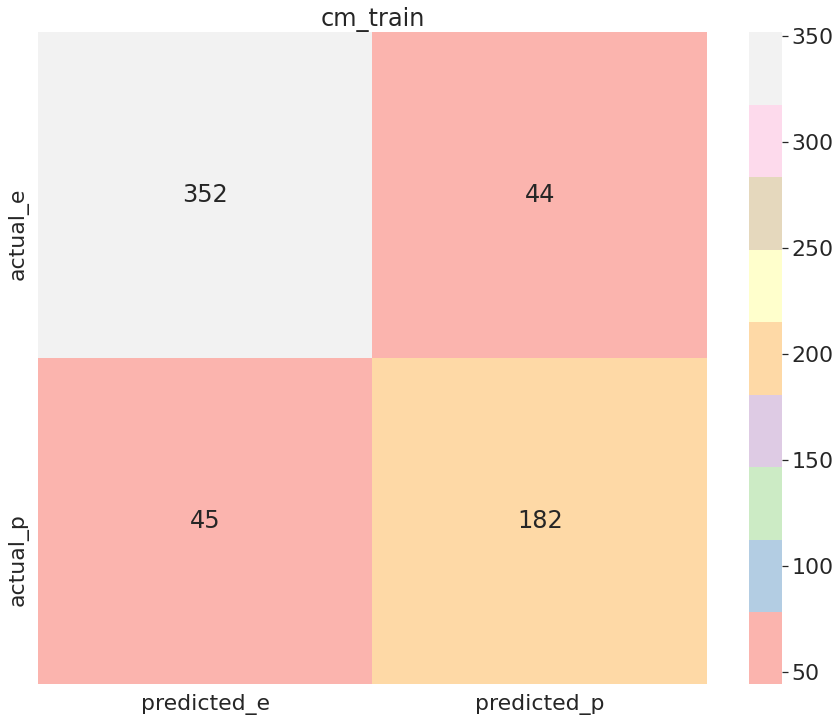

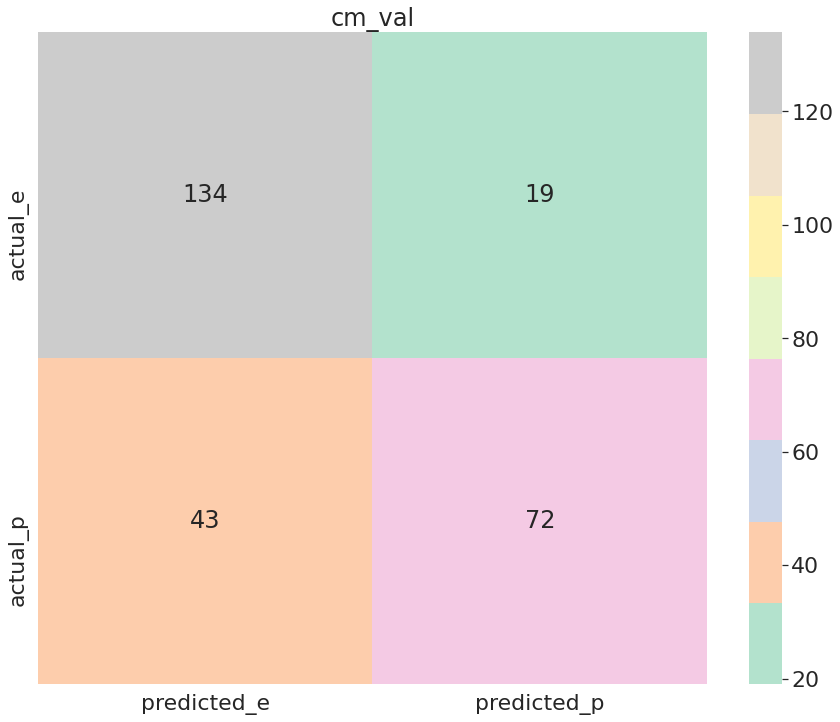

0.8027137736815156

In [60]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

confusion_matrix_function(SVMC_best,X_train, X_val, Y_train, t_val)
# Best score
gsSVMC.best_score_

## Plot Learning Curves
### Diagnose Bias and Variance to Reduce Error
### Learning curves are a good way to see the overfitting and underfitting effect on the training set and the effect of the training size on the accuracy. Learning curves plots the model's performance on the training set and the validation set as a function of training set size.
### To generate the plots, we simply train the model several times on different sized subsets of the training sets

### Underfitting: If model is underfitting the training data, adding more training example will not help. We need to use more complex model or come up with better features.

 
### Overfitting: One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.



In [61]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
  
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

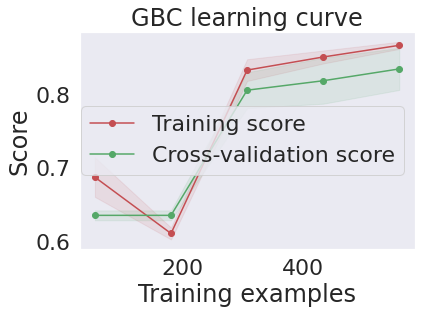

In [62]:
# Gradient boosting - Learning Curve 
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GBC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

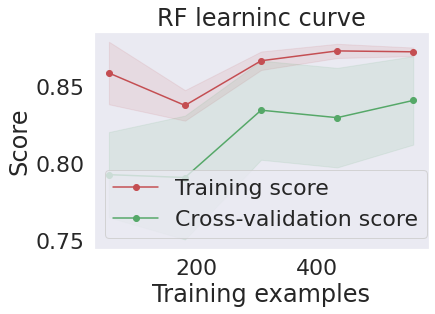

In [63]:
# Random Forest - Learning Curve
plot_learning_curve(estimator = gsRFC.best_estimator_ ,title = "RF learninc curve",
                    X = X_train, y = Y_train, cv = K_fold);

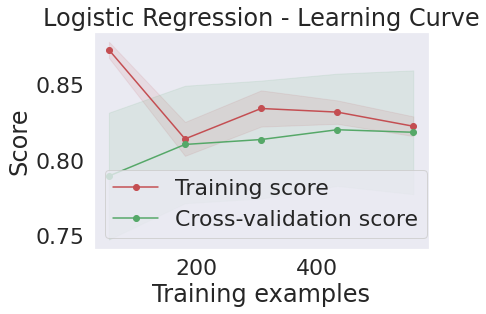

In [64]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
plot_learning_curve(estimator = Log_Model ,title = "Logistic Regression - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

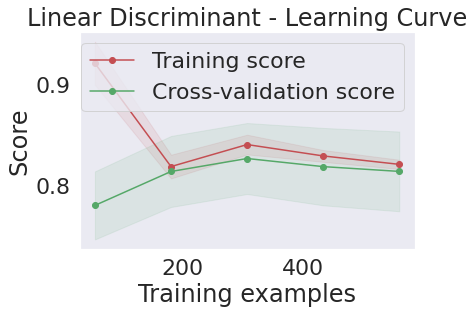

In [65]:
# Linear Discriminant Analysis - Learning Curve
plot_learning_curve(estimator = gsLDA.best_estimator_ ,title = "Linear Discriminant - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

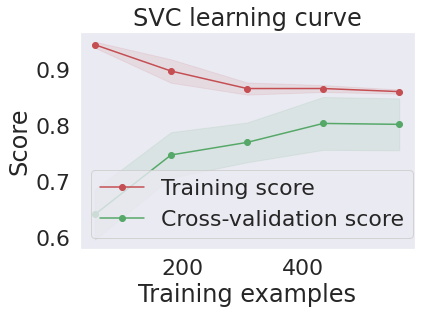

In [66]:
# Support Vector Machine - Learning Curve
plot_learning_curve(estimator = gsSVMC.best_estimator_,title = "SVC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

### Random Forest and GradientBoosting classifiers tend to overfit the training set. One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.

[0.85714286 0.84126984 0.85714286 0.88709677 0.87096774 0.83870968
 0.83870968 0.83870968 0.88709677 0.77419355]
84.91
cm_train
[[375  21]
 [ 55 172]]

cm_val
[[138  15]
 [ 42  73]]
Train: TN  375, FP   21, FN   55, TP  172
Val:   TN  138, FP   15, FN   42, TP   73


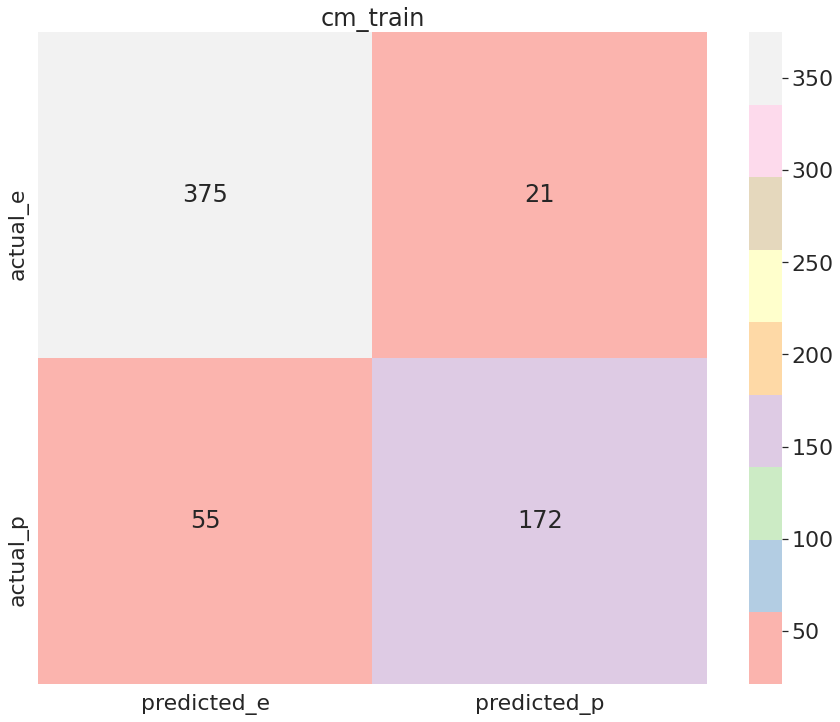

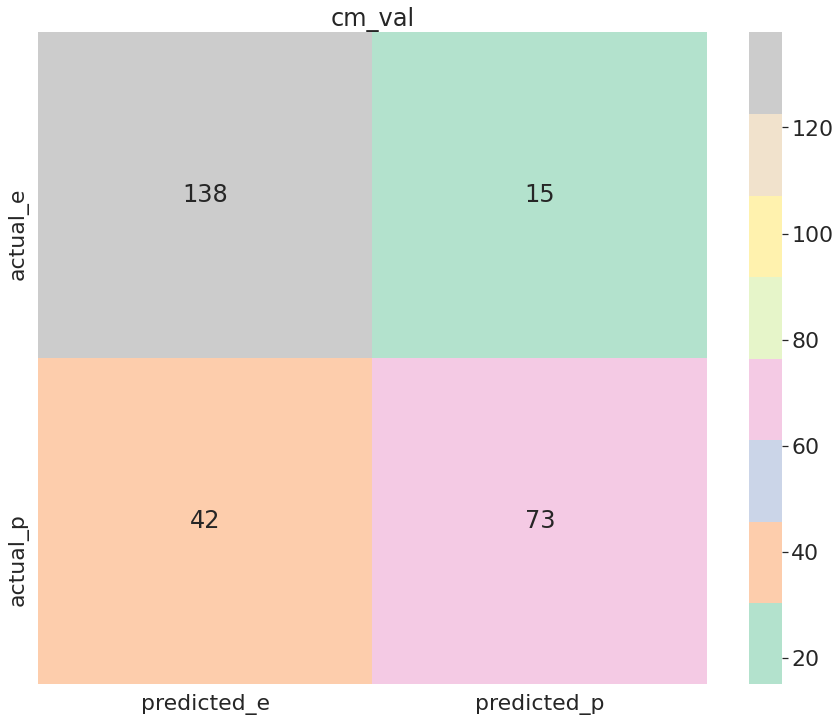

In [67]:
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best)],
                           voting='soft', n_jobs = 4)


VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

confusion_matrix_function(VotingPredictor,X_train, X_val, Y_train, t_val)

Let's create a method that gets: data and model and returns R2 score and MSE loss



In [68]:
from sklearn.model_selection import KFold
# calculate score and loss from KFold and display graphs
def get_cv_score_and_loss(X, t, model, show_score_loss_graphs=False):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])
    cv = KFold(n_splits=10, shuffle=True, random_state=1)

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train),log_loss(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val),log_loss(t_val, y_val)]


    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

In [69]:

val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, VotingPredictor, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.83
mean cv val loss 5.93
mean cv train score: 0.87
mean cv train loss 4.38


In [70]:
Predictive_Model = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": VotingPredictor.predict(X_test)})

Predictive_Model.to_csv('VotingPredictor_model.csv', index=False)

LDA_best_Model = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": LDA_best.predict(X_test)})

Predictive_Model.to_csv('LDA_best_model.csv', index=False)


RFC_best_Model = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": RFC_best.predict(X_test)})

Predictive_Model.to_csv('RFC_best_model.csv', index=False)

GBC_best_Model = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": GBC_best.predict(X_test)})

Predictive_Model.to_csv('GBC_best_model.csv', index=False)

# Summary:
The work was very instructive and we received a lot of tools during the course that helped me understand concepts from the world of machine learning. We have learned many techniques and ways to pinpoint our model percentages

It was a very good practice regarding our new subjects even though I was not able to increase the accuracy percentages of my model by much. I really enjoyed the process and experimenting with different functions and libraries.

## References List : 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.codementor.io/@innat_2k14/titanic-kaggle-machine-learning-from-disaster-part-1-10gbvqzguc
* https://www.kaggle.com/vinceallenvince/titanic-guided-by-a-confusion-matrix
* Fourth/Fifth/SixthPracticeML
